Text(0.5, 0.98, 'MCPS HOT STARS AV MAPS vs SUMS COVERAGE\nLMC: 74.64% stars with Av > 0.38\n 25.09% stars with Av < 0.38')

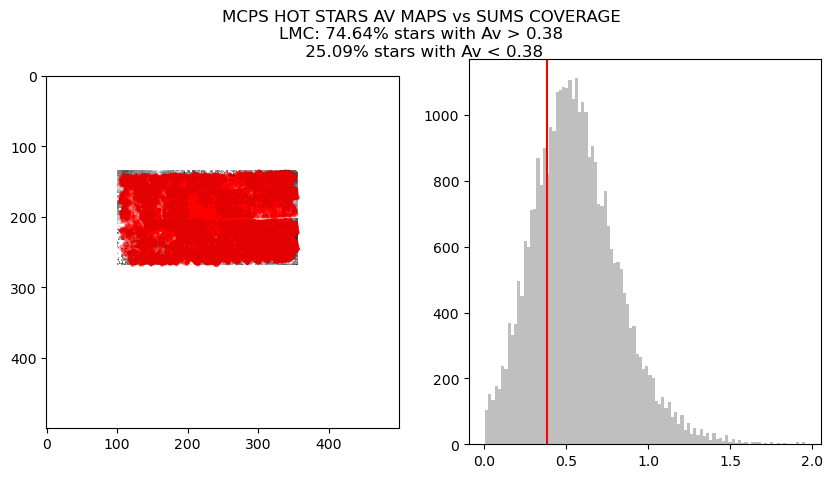

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
directory = os.getenv("DATADIR")
lmc_Av0 = 0.38 #
smc_Av0 = 0.22 

lmc = fits.open(f"{directory}/4_MagellanicClouds/MCPS/lmc_hotav.fits")

df = pd.read_csv(f"{directory}/0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Catalog.csv")


df_lmc = df[df.RA > 30]
dlmc = lmc[0].data
dlmc[:,:100] = 0
dlmc[:,358:] = 0
dlmc[:133,:] = 0
dlmc[270:,:] = 0
# Turn all zeroes to NaN
dlmc[dlmc == 0] = np.nan
x,y = WCS(lmc[0].header).all_world2pix(df_lmc['RA'], df_lmc['Dec'], 0)

f, (ax,bx) = plt.subplots(1, 2, figsize=(10, 5))
ax.imshow(dlmc, cmap='gray', vmin=0, vmax=1)
ax.scatter(x, y, s=.1, c='red', alpha=0.1)

vals = dlmc.flatten()
vals = vals[~np.isnan(vals)]
vals_above = vals[vals > lmc_Av0]
vals_below = vals[vals < lmc_Av0]
bx.hist(vals, bins=100, color='gray', alpha=0.5);
bx.axvline(lmc_Av0, color='red', label='LMC Av=0.38')

plt.suptitle(f'MCPS HOT STARS AV MAPS vs SUMS COVERAGE\nLMC: {len(vals_above)/len(vals)*100:.2f}% stars with Av > 0.38\n {len(vals_below)/len(vals)*100:.2f}% stars with Av < 0.38')

Text(0.5, 0.98, 'MCPS HOT STARS AV MAPS vs SUMS COVERAGE\nSMC: 89.99% stars with Av > 0.22\n 9.62% stars with Av < 0.22')

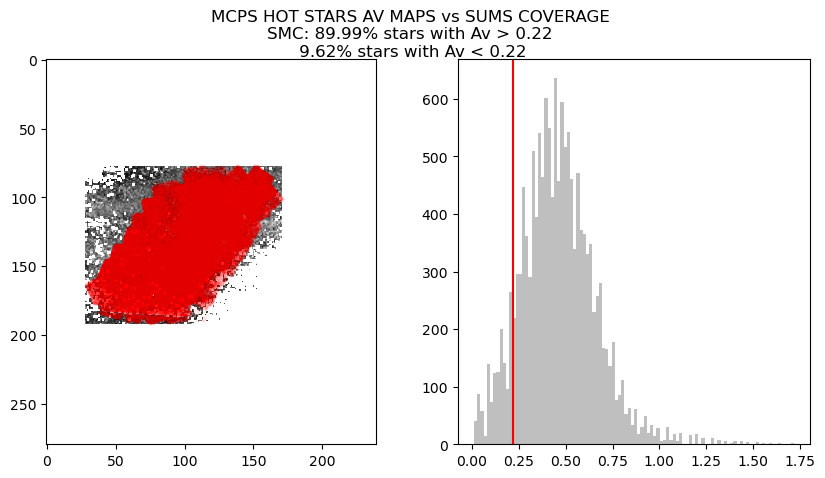

In [61]:
smc = fits.open(f"{directory}/4_MagellanicClouds/MCPS/smc_hotav.fits")
df_smc = df[df.RA < 30]
dsmc = smc[0].data
dsmc[:,:28] = 0
dsmc[:,172:] = 0
dsmc[:77,:] = 0
dsmc[193:,:] = 0

# Turn all zeroes to NaN
dsmc[dsmc == 0] = np.nan

x,y = WCS(smc[0].header).all_world2pix(df_smc['RA'], df_smc['Dec'], 0)
f, (ax,bx) = plt.subplots(1, 2, figsize=(10, 5))
ax.imshow(dsmc, cmap='gray', vmin=0, vmax=1)
ax.scatter(x, y, s=.1, c='red', alpha=0.1)
vals = dsmc.flatten()
vals = vals[~np.isnan(vals)]
bx.hist(vals, bins=100, color='gray', alpha=0.5);
vals_above = vals[vals > smc_Av0]
vals_below = vals[vals < smc_Av0]

bx.axvline(smc_Av0, color='red', label='SMC Av=0.22')
plt.suptitle(f'MCPS HOT STARS AV MAPS vs SUMS COVERAGE\nSMC: {len(vals_above)/len(vals)*100:.2f}% stars with Av > 0.22\n {len(vals_below)/len(vals)*100:.2f}% stars with Av < 0.22')

(125.0, 275.0)

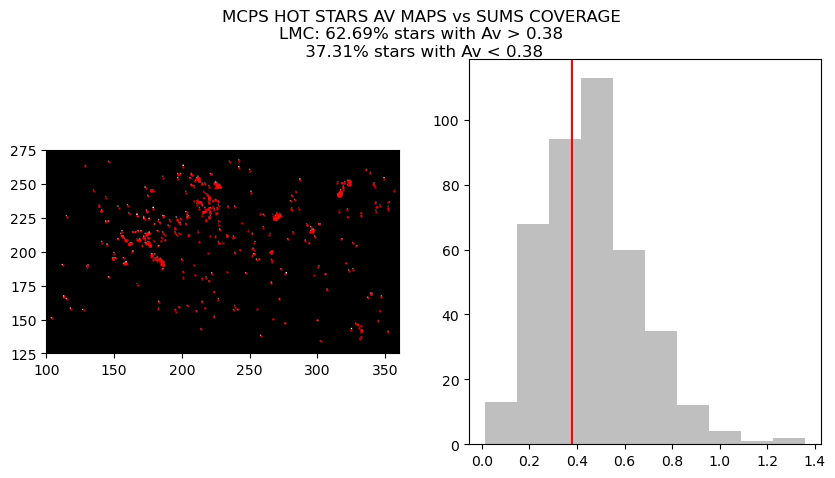

In [62]:
# Now to see what the distribution is for the candidates
candidates = pd.read_csv(f"{directory}/0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Candidate_Catalog.csv")
lmc_candidates = candidates[candidates.RA > 30]

lmc = fits.open(f"{directory}/4_MagellanicClouds/MCPS/lmc_hotav.fits")
dlmc = lmc[0].data


x,y = WCS(lmc[0].header).all_world2pix(lmc_candidates['RA'], lmc_candidates['Dec'],0)
int_x =  np.round(x).astype(int)
int_y =  np.round(y).astype(int)
mask = np.zeros(dlmc.shape)
mask[int_y,int_x] = 1

r_dlmc = dlmc*mask

f, (ax,bx) = plt.subplots(1, 2, figsize=(10, 5))

ax.imshow(r_dlmc, cmap='gray',vmin=0, vmax=1)
ax.scatter(x, y, s=1, c='red', alpha=0.5)
vals = r_dlmc.flatten()
vals = vals[vals !=0]
bx.hist(vals, bins=10, color='gray', alpha=0.5);
vals_above = vals[vals > lmc_Av0]
vals_below = vals[vals < lmc_Av0]
bx.axvline(lmc_Av0, color='red', label='LMC Av=0.38')
plt.suptitle(f'MCPS HOT STARS AV MAPS vs SUMS COVERAGE\nLMC: {len(vals_above)/len(vals)*100:.2f}% stars with Av > 0.38\n {len(vals_below)/len(vals)*100:.2f}% stars with Av < 0.38')

ax.set_xlim(100,360)
ax.set_ylim(125,275)

# I zoomed into check the pixels overlap the sources
# plt.xlim(150,200)
# plt.ylim(200,220)

(60.0, 200.0)

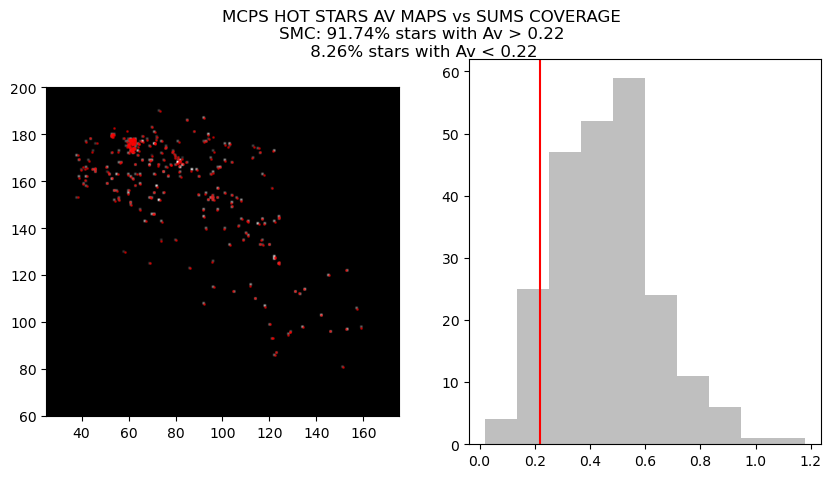

In [ ]:
smc_candidates = candidates[candidates.RA < 30]

smc = fits.open(f"{directory}/4_MagellanicClouds/MCPS/smc_hotav.fits")
dsmc = smc[0].data
x,y = WCS(smc[0].header).all_world2pix(smc_candidates['RA'], smc_candidates['Dec'],0)
int_x =  np.round(x).astype(int)
int_y =  np.round(y).astype(int)
mask = np.zeros(dsmc.shape)
mask[int_y,int_x] = 1
r_dsmc = dsmc*mask
f, (ax,bx) = plt.subplots(1, 2, figsize=(10, 5))
ax.imshow(r_dsmc, cmap='gray',vmin=0, vmax=1)
ax.scatter(x, y, s=1, c='red', alpha=0.5)
vals = r_dsmc.flatten()
vals = vals[vals !=0]
bx.hist(vals, bins=10, color='gray', alpha=0.5);
vals_above = vals[vals > smc_Av0]
vals_below = vals[vals < smc_Av0]
bx.axvline(smc_Av0, color='red', label='SMC Av=0.22')
plt.suptitle(f'MCPS HOT STARS AV MAPS vs SUMS COVERAGE\nSMC: {len(vals_above)/len(vals)*100:.2f}% stars with Av > 0.22\n {len(vals_below)/len(vals)*100:.2f}% stars with Av < 0.22')
ax.set_xlim(25,175)
ax.set_ylim(60,200)